### invistgating model 1134 switching behavior

In [1]:
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas.api.types as ptypes
%matplotlib inline

Using TensorFlow backend.


In [5]:
def calculate_mean_window(c,vector):
    if vector.shape[0]%c !=0:
        rem = vector.shape[0]%c
        needed = c-rem
        needed = np.zeros(c-rem)
        vector = np.concatenate([vector,needed])
    vector = np.reshape(vector,(c,-1))
    vector = np.mean(vector,axis=0)
    return vector

def seperate_dataset(data):
    eaten = data[(data[2]>880)|(data[2]<-880)]
    avoided = data[(data[2]<0)&(data[2]>-15)]
    if ptypes.is_numeric_dtype(data[8].dtype):
        el = eaten[eaten[8]==0].shape[0]
        ei = eaten[eaten[8]==1].shape[0]
        ai = avoided[avoided[8]==0].shape[0]
        al = avoided[avoided[8]==1].shape[0]
    else:
        el = eaten[eaten[8]=='[0]'].shape[0]
        ei = eaten[eaten[8]=='[1]'].shape[0]
        ai = avoided[avoided[8]=='[0]'].shape[0]
        al = avoided[avoided[8]=='[1]'].shape[0]
    return el,ei,al,ai

def Process_data(data,window):
    times = int(data.shape[0]/window)
    draw_data = np.zeros((times+1,4))
    for i in range(times+1):
        draw_data[i] = seperate_dataset(data[i*window:(i+1)*window])
    return draw_data

def plotdata(data,window,i=None):
    draw_data1 = Process_data(data[data[5]=='Test'],window)
    
    plt.figure(figsize=(12,6))
    plt.plot(draw_data1[:,0],c='green',label='eaten correctly')
    plt.plot(draw_data1[:,1],c='red',label='eaten incorrectly')
    plt.plot(draw_data1[:,2],c='blue',label='avoided correctly')
    plt.plot(draw_data1[:,3],c='purple',label='avoided incorrectly')
    plt.xlabel('Sum of {} episode'.format(window))
    plt.ylabel('Count')
    plt.title('Over Testing Episodes')
    plt.legend()
    
    draw_data = Process_data(data[data[5]=='train'],window)
    plt.figure(figsize=(12,6))
    plt.plot(draw_data[:,0],c='green',label='eaten correctly')
    plt.plot(draw_data[:,1],c='red',label='eaten incorrectly')
    plt.plot(draw_data[:,2],c='blue',label='avoided correctly')
    plt.plot(draw_data[:,3],c='purple',label='avoided incorrectly')
    plt.xlabel('Sum of {} episode'.format(window))
    plt.ylabel('Count')
    plt.title('Over training Episodes, Model:{}'.format(i))
    plt.legend()
    #draw_data(data[data[5]=='train'],window)
    return draw_data,draw_data1

In [6]:
x = pd.read_csv('output/1134/exp_details.csv',header=None)

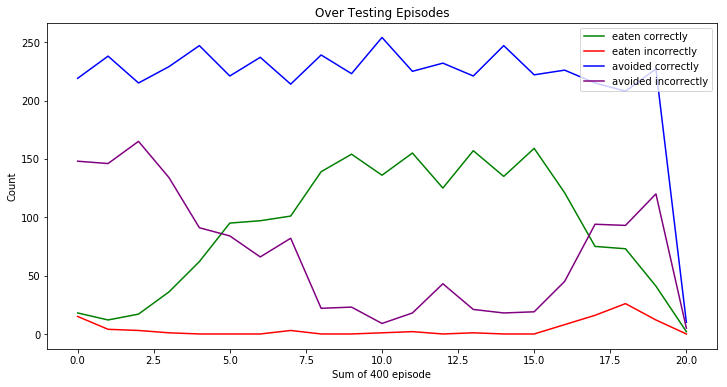

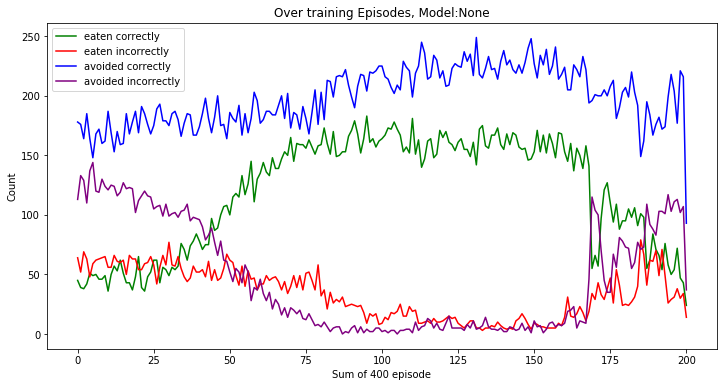

In [7]:
onep,twop = plotdata(x,window=400)

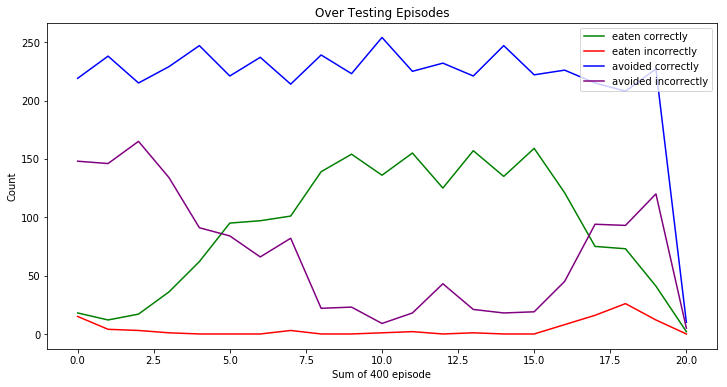

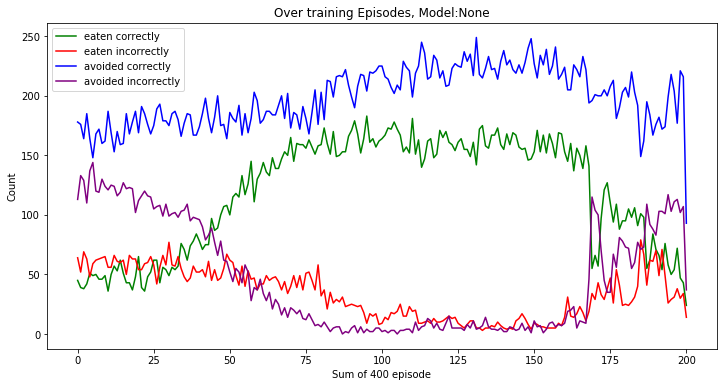

In [4]:
onep,twop = plotdata(x,window=400)

In [8]:
x = load_model('output/1134/MOD/model_eps:67400.h5')
y = load_model('output/1134/MOD/model_eps:67500.h5')
final = load_model('output/1134/MOD/model.h5')

/gpfs/hpchome/labash/miniconda3/envs/PT/lib/python3.5/site-packages/keras/engine/topology.py:1271: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [9]:
x_w = x.get_weights()
y_w = y.get_weights()
final_w = final.get_weights()

differ = 0
means = []
level =0
for i,j in zip(x_w,y_w):
    means.append(i.mean())
    means.append(j.mean())
    dif = np.sum(np.abs(i-j))
    print('level:{},dif:{},shape:{}'.format(level,dif,i.shape))
    level+=1
    differ += dif

differ

level:0,dif:3.38285231590271,shape:(3, 3, 5, 6)
level:1,dif:0.08137424290180206,shape:(6,)
level:2,dif:408.1088562011719,shape:(734, 32)
level:3,dif:0.383531391620636,shape:(32,)
level:4,dif:13.575773239135742,shape:(32, 32)
level:5,dif:0.31792810559272766,shape:(32,)
level:6,dif:255.22994995117188,shape:(32, 512)
level:7,dif:1071.599853515625,shape:(128, 512)
level:8,dif:7.788130283355713,shape:(512,)
level:9,dif:98.5780029296875,shape:(128, 6)
level:10,dif:0.7783495783805847,shape:(6,)


1859.8246017545462

In [10]:
x.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 11, 11,  0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 100, 11, 11,  276         input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 100, 726)     0           time_distributed_1[0][0]         
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100, 8)       0                                            
__________________________________________________________________________________________________
merge_1 (M

In [ ]:
x = pd.read_csv('output/1134/exp_details.csv',header=None)

x = x[x[5]=='Test']

x.shape